In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

coupe_1 = ['2.B53', '2.B54']
coupe_2 = ['2.B55', '2.B56']
coupe_3 = ['2.B57', '2.B58']
coupe_4 = ['2.B59', '2.B60']


In [53]:
data_test = pd.read_excel('Data_clean/Locus_sensors/2.B54_processed.xlsx')

In [54]:
data_test.head()

,Date,Count
0,2024-04-01 10:31:03,1.0
1,2024-04-01 10:36:02,0.0
2,2024-04-01 10:41:02,4.0
3,2024-04-01 10:46:02,0.0
4,2024-04-01 10:51:02,0.0


ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of labels (16).

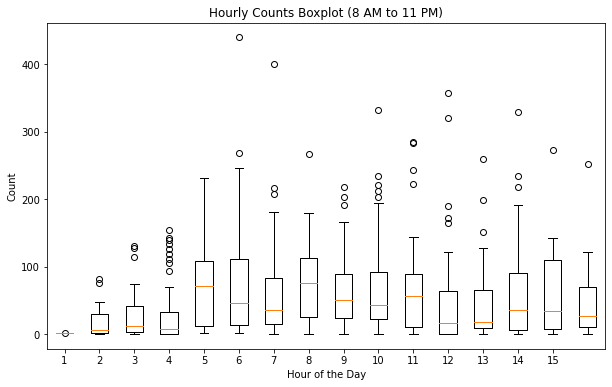

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

data_test['Date'] = pd.to_datetime(data_test['Date'], errors='coerce')

hourly_counts = data_test.groupby([data_test['Date'].dt.date, data_test['Date'].dt.hour])['Count'].sum()
hourly_counts_list = [[] for _ in range(16)]  

for date, hour in hourly_counts.index:
    if 8 <= hour <= 23:
        hourly_counts_list[hour - 8].append(hourly_counts[(date, hour)])

plt.figure(figsize=(10, 6))
plt.boxplot(hourly_counts_list)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Hourly Counts Boxplot (8 AM to 11 PM)')
plt.xticks(ticks=range(1, 16), labels=range(8, 24)) 
plt.show()
